In [1]:
import pandas as pd

train_df = pd.read_csv("./data/preprocessed_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/preprocessed_test.csv", encoding="utf-8")

In [2]:
y_train = train_df["Transported"]
x_train = train_df.drop(["PassengerId", "Transported"], axis=1)

In [3]:
x_test = test_df.drop(["PassengerId"], axis=1)

## **DecisionTree & Cross Validation**

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="entropy" 
)

In [5]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
model.score(x_train, y_train) #모델의 성능을 평가

0.9993097894857932

In [7]:
from sklearn.model_selection import cross_val_score, KFold

In [8]:
kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=1234
)

In [9]:
model = DecisionTreeClassifier(
    criterion="entropy" 
)

In [10]:
cross_val_scores = cross_val_score(model, x_train, y_train, cv=kf)

In [11]:
cross_val_scores

array([0.76078206, 0.73778033, 0.75100633, 0.73532796, 0.73532796])

In [12]:
print("평균 정확도:", cross_val_scores.mean())

평균 정확도: 0.7440449288011907


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=1234
)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [14]:
y_test = model.predict(x_test)

In [15]:
test_df["Transported"] = y_test

In [16]:
test_df[["PassengerId", "Transported"]].to_csv("./data/DecisionTree.csv", index=False, encoding="utf-8")

## **DecisionTree & max_depth**

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="entropy",
    random_state=1234,
    max_depth=3
)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

In [18]:
feature_names = x_train.columns.to_list()
importances = model.feature_importances_

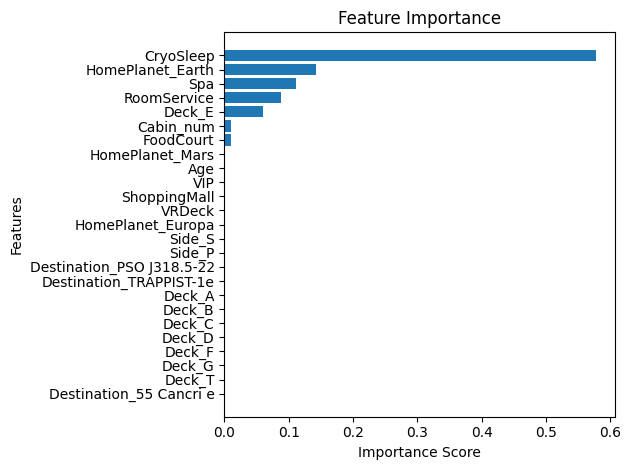

In [19]:
import numpy as np
from matplotlib import pyplot as plt

indices = np.argsort(importances)
sorted_feature_names = [feature_names[i] for i in indices]

# Create plot
plt.figure()
plt.title("Feature Importance")
ticks = range(len(feature_names))
plt.barh(ticks, importances[indices], align="center")
plt.yticks(ticks, sorted_feature_names)
plt.ylabel("Features")
plt.xlabel("Importance Score")

plt.tight_layout()
plt.show()

In [20]:
y_test = model.predict(x_test)

In [21]:
test_df["Transported"] = y_test

In [22]:
test_df[["PassengerId", "Transported"]].to_csv("./data/DecisionTree_MaxDepth.csv", index=False, encoding="utf-8")

## **RandomForst**

In [35]:
y_train = train_df["Transported"]
x_train = train_df.drop(["PassengerId", "Transported", "Cabin_num"], axis=1)
x_test = test_df.drop(["PassengerId", "Transported", "Cabin_num"], axis=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=1234,
    n_estimators=10
)

In [37]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[10, 20, 40, 50],
    "max_depth":[3, 5, 7, 10],
    "max_features":[6, 12, 20, 25]
}

In [39]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)

In [40]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf,
    # verbose=3
)

In [41]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                              n_estimators=10,
                                              random_state=1234),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': [6, 12, 20, 25],
                         'n_estimators': [10, 20, 40, 50]})

In [42]:
grid_search.best_params_, grid_search.best_score_

({'max_depth': 10, 'max_features': 6, 'n_estimators': 50}, 0.8014481954961351)

In [43]:
model = RandomForestClassifier(
    criterion="entropy",
    max_depth=10,
    n_estimators=50,
    max_features=6,
    random_state=1234
)

In [44]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       n_estimators=50, random_state=1234)

In [45]:
y_test = model.predict(x_test)

In [46]:
test_df["Transported"] = y_test

In [47]:
test_df[["PassengerId", "Transported"]].to_csv("./data/RandomForest.csv", index=False, encoding="utf-8")